# **ACTIVIDAD EVALUABLE**
## **INTEGRANTES:**
## **Keyla Patricia Islas Garrido	     A01730349**
## **Marco Eduardo Rodas Cardona		   A01701870** 
## **José Antonio Velázquez Govea		   A01702200**
## **Rodrigo Mendoza Orea				       A01658480**

## **PyColab**
##**Representante :** José Antonio Velázquez Govea

In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from numpy import integer
import matplotlib.pyplot as plt
!pip install missingno
import missingno as msno
%matplotlib inline
from datetime import date,time,datetime,timedelta
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import pandas as pd

import plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data Sets

In [ ]:
transaction = pd.read_csv("TRANSACTIONMASTER.csv",encoding="ISO-8859-1") #Transacciones

## Transaction 

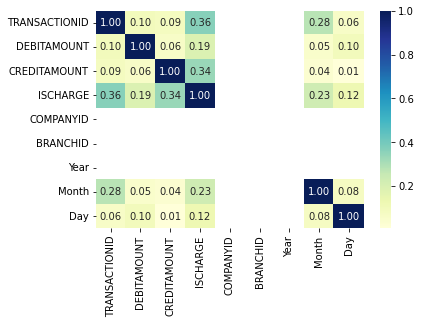

In [ ]:
Corr_Factors=transaction.corr()
Corr_Factors1= abs(Corr_Factors)
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

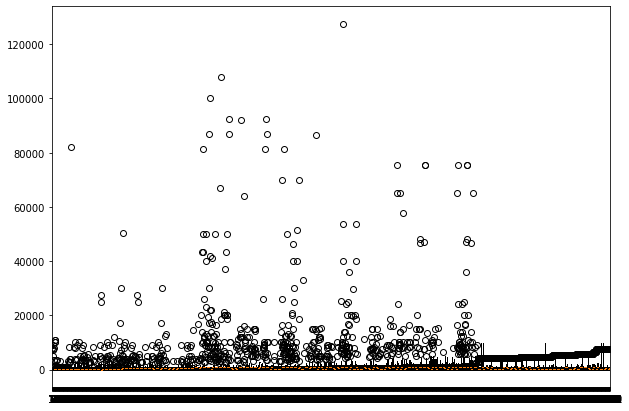

In [ ]:
tran=transaction.drop(["TAXID","ACCOUNT","DESCRIPTION","TRANSACTIONDATETIME","ISCHARGE","CREATEDDATETIME","CLEANDESCRIPTION"],axis=1)
fig = plt.figure(figsize =(10, 7)) 
  
plt.boxplot(tran) 
  
plt.show() 

Un paso posterior que podemos realizar también es la separación de la información para el cliente deseado, ingresando el rfc del cliente y así buscando en la base de datos todos los movimientos realizados con su RFC

In [ ]:
taxid=input('Introduce el rfc del cliente:')
data1=transaction.loc[transaction['TAXID'] == taxid]

Introduce el rfc del cliente:LOGJ911206KL4


Agrupamos la información por fecha y con variables de relevancia para el cliente.

El cliente puede ser capaz de elegir el tiempo y que variables observar.



In [ ]:
data1

,TRANSACTIONID,TAXID,ACCOUNT,DESCRIPTION,DEBITAMOUNT,CREDITAMOUNT,ISCHARGE,CREATEDDATETIME,COMPANYID,BRANCHID,CLEANDESCRIPTION,Year,Month,Day,Quarter
0,1,LOGJ911206KL4,Cta Perfil Ejc - MXN-692,P TER 0000030921 JESUS CHRISTOPHER LOPEZ GONZA...,1000.00,0.0,True,2021-10-15 07:38:08.563000,1000,1,PAGO A TERCEROS,2021,9,3,Q3
1,2,LOGJ911206KL4,Cta Perfil Ejc - MXN-692,DEPOSITO INTERBANCARIO AUT 150037,0.00,8000.0,False,2021-10-15 07:38:08.563000,1000,1,DEPOSITO,2021,9,2,Q3
2,3,LOGJ911206KL4,Cta Perfil Ejc - MXN-692,DEPOSITO INTERBANCARIO AUT 603592,0.00,1000.0,False,2021-10-15 07:38:08.563000,1000,1,DEPOSITO,2021,8,27,Q3
3,4,LOGJ911206KL4,Cta Perfil Ejc - MXN-692,0000000000378104 PAGO A TERCEROS 378104 PA...,100.00,0.0,True,2021-10-15 07:38:08.563000,1000,1,PAGO A TERCEROS,2021,7,15,Q3
4,5,LOGJ911206KL4,Cta Perfil Ejc - MXN-692,DEPOSITO INTERBANCARIO AUT 287046,0.00,5000.0,False,2021-10-15 07:38:08.563000,1000,1,DEPOSITO,2021,7,15,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2238,2705,LOGJ911206KL4,*9537,PAYPAL GOOGLE BUMBLE,199.00,0.0,True,2022-02-23 04:30:39.350000,1000,1,GOOGLE BUMBLE,2021,12,30,Q4
2239,2706,LOGJ911206KL4,*9537,D LOCAL *GODADDY,1043.64,0.0,True,2022-02-23 04:30:39.350000,1000,1,GODADDY,2021,12,26,Q4
2240,2707,LOGJ911206KL4,*9537,ZOOM.US 888-799-9666,360.22,0.0,True,2022-02-23 04:30:39.367000,1000,1,NaN,2021,12,25,Q4
2241,2708,LOGJ911206KL4,*9537,07 DE 12 PAYPAL CLAROSHOPC,288.00,0.0,True,2022-02-23 04:30:39.367000,1000,1,07 12 PAYPAL CLAROSHOPC,2021,12,23,Q4


In [ ]:
transaction_stats= data1.groupby(['Year','Quarter','Month']).sum()[['DEBITAMOUNT', 'CREDITAMOUNT']]
transaction_stats

DEBITAMOUNT  CREDITAMOUNT
Year Quarter Month                           
2021 Q2      6         41235.80      40553.80
     Q3      7        245944.22     140912.97
             8        122145.57      95527.21
             9        201204.26     116511.95
     Q4      10       130158.93      99386.01
             11       112218.10      78525.65
             12       144327.60     144945.77

Con esta información realizamos gráficas de barras para observar las entradas y salidas de dinero de un cliente a traves del tiempo.

In [ ]:
data5 = data1.groupby('Month')[['DEBITAMOUNT','CREDITAMOUNT']].sum()

fig = go.Figure()
fig.add_trace(go.Scatter(x=data5.index, y=data5['DEBITAMOUNT'], fill='tonexty',name="Debit Amount")) # fill down to xaxis
fig.add_trace(go.Scatter(x=data5.index, y=data5['CREDITAMOUNT'], fill='tozeroy',name="Credit Amount")) # fill to trace0 y
fig.update_layout(
    title="Month vs Debit and Credit Amount",
    xaxis_title="Month",
    yaxis_title="Total",
    legend_title="Variables",
    font=dict(
        family="Timesnewroman, monospace",
        size=18,
        color="RebeccaPurple"))
fig.show()

Text(0.5, 1.0, 'Transactions per Month')

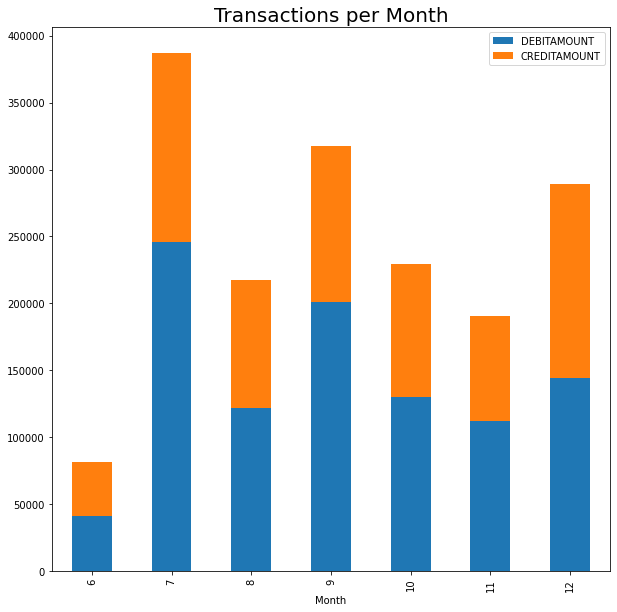

In [ ]:
transaction_stats= data1.groupby(['Month']).sum()[['DEBITAMOUNT', 'CREDITAMOUNT']]
transaction_stats.plot.bar(stacked=True,figsize=(10,10))
plt.title("Transactions per Month",fontsize=20)


In [ ]:
data6 = data1.groupby('Year')[['DEBITAMOUNT','CREDITAMOUNT']].sum()

fig = go.Figure()

fig.add_trace(go.Bar(x=data6.index, y=data6['DEBITAMOUNT'],name='Debit Amount')) # fill down to xaxis
fig.add_trace(go.Bar(x=data6.index, y=data6['CREDITAMOUNT'],name='Credit Amount')) # fill to trace0 y
fig.update_layout(
    title="Year vs Debit and Credit Amount",
    xaxis_title="Year",
    yaxis_title="Total",
    legend_title="Variables",
    font=dict(
        family="Timesnewroman, monospace",
        size=18,
        color="RebeccaPurple"))
fig.show()

Text(0.5, 1.0, 'Transactions per Year')

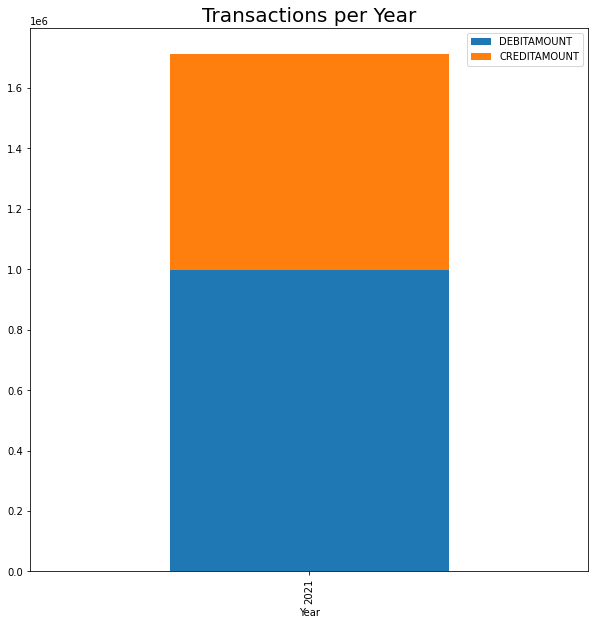

In [ ]:
transaction_stats= data1.groupby(['Year']).sum()[['DEBITAMOUNT', 'CREDITAMOUNT']]
transaction_stats.plot.bar(stacked=True,figsize=(10,10))
plt.title("Transactions per Year",fontsize=20)


In [ ]:
data7 = data1.groupby('Quarter')[['DEBITAMOUNT','CREDITAMOUNT']].sum()

fig = go.Figure()
fig.add_trace(go.Scatter(x=data7.index, y=data7['DEBITAMOUNT'], fill='tonexty',name='Debit Amount')) # fill down to xaxis
fig.add_trace(go.Scatter(x=data7.index, y=data7['CREDITAMOUNT'], fill='tozeroy',name='Credit Amount')) # fill to trace0 y
fig.update_layout(
    title="Quarter vs Debit and Credit Amount",
    xaxis_title="Year",
    yaxis_title="Total",
    legend_title="Variables",
    font=dict(
        family="Timesnewroman, monospace",
        size=18,
        color="RebeccaPurple"))
fig.show()

Text(0.5, 1.0, 'Transactions per Quarter')

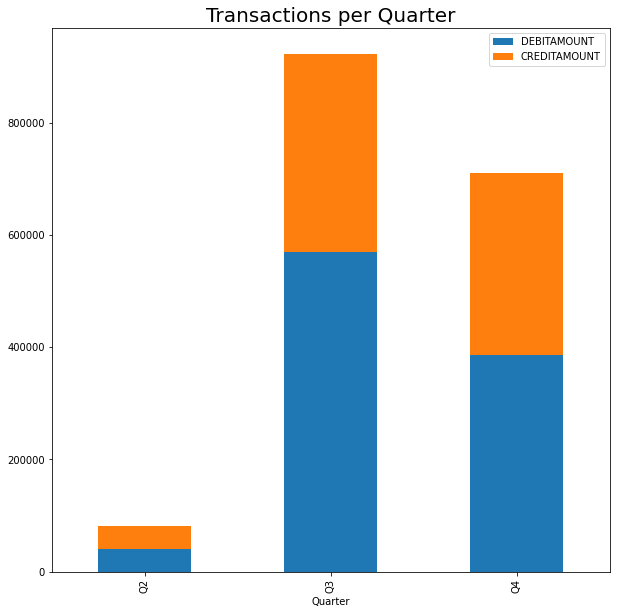

In [ ]:
transaction_stats= data1.groupby(['Quarter']).sum()[['DEBITAMOUNT', 'CREDITAMOUNT']]
transaction_stats.plot.bar(stacked=True,figsize=(10,10))
plt.title("Transactions per Quarter",fontsize=20)


# Conclusiones:
¿Hay alguna variable que no aporta información?

COMPANYID
BRANCHID 

La cardinalidad de estas variables es de 1, por lo cual no representan información relevante.

Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?



¿Existen variables que tengan datos extraños?

CLEANDESCRIPTION 

Cuenta con la descripción de cada transacción, sin embargo, por tener una cardinalidad tan grande es complicado poder obtener información para analizar.

Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?

Solo tenemos dos variables numericas, estas se manejan en rangos similares por cliente, debido a que estas son las entradas y salidas de dinero.

¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

En actividades pasadas hicimos clusterización de los tipos de cliente con base a sus entradas y salidas de dinero.

El data set de transacciones unicamente maneja los datos de 5 clientes.

De estos podemos ver 3 distintos tipos de cliente.
